<a href="https://colab.research.google.com/github/ferperezh/IIC3633_ProyectoMetricaDiversidad/blob/main/pelicula_metrica_diversidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métrica **Diversidad de Usuario** en la Música

## Importar los datos
Es necesario agregar el archivo "kaggle.json" disponible en el repositorio al entorno de archivos del Colab:
- https://github.com/ferperezh/IIC3633_ProyectoMetricaDiversidad/blob/main/kaggle.json

In [4]:
# Crear el directorio .kaggle en Colab
!mkdir -p ~/.kaggle

# Mover el archivo kaggle.json al directorio .kaggle
!cp kaggle.json ~/.kaggle/

# Cambiar los permisos del archivo kaggle.json para asegurar privacidad
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!pip install kaggle

In [6]:
# Descargar el dataset
!kaggle datasets download -d grouplens/movielens-20m-dataset

# Descomprimir el archivo zip descargado
import zipfile
with zipfile.ZipFile("movielens-20m-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("movielens-20m-dataset")

print("Path to dataset files: movielens-20m-dataset")

Dataset URL: https://www.kaggle.com/datasets/grouplens/movielens-20m-dataset
License(s): unknown
movielens-20m-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Path to dataset files: movielens-20m-dataset


## Procesamiento de Datasets Peliculas
Consideramos la tabla `ratings` para tener los ratings que un usuario le da a una pelicula dad. Por lo que obetenemos el promedio de rating que da cada usuario y luego consideramos solo las peliculas que estan sobre el promedio de cada usario. Esas vamos a considerar como las peliculas del usuario. Para luego hacer el join con `movie` mara obtener la metadata.

In [7]:
import pandas as pd

genome_scores = pd.read_csv('movielens-20m-dataset/genome_scores.csv')
genome_tags = pd.read_csv('movielens-20m-dataset/genome_tags.csv')
links = pd.read_csv('movielens-20m-dataset/link.csv')
movies = pd.read_csv('movielens-20m-dataset/movie.csv')
ratings = pd.read_csv('movielens-20m-dataset/rating.csv')
tags = pd.read_csv('movielens-20m-dataset/tag.csv')

In [8]:
# Agrupar por usuario la tabla raitings para tener el rating promedio que le da a las peliculas
ratings_por_usuario = ratings.groupby('userId')['rating'].mean()
# Hacemos un round a la decima
ratings_por_usuario = ratings_por_usuario.round(1)
ratings_por_usuario

# Ahora agregamos la columna rating_mean a la tabla rating con esta informacion
ratings['rating_mean'] = ratings['userId'].map(ratings_por_usuario)

In [9]:
# Filtramos por todos los ratings que son mayor o igual al rating_mean
ratings_filtrados = ratings[ratings['rating'] >= ratings['rating_mean']]

Ahora las conectamos `ratings_filtrados` con la metada

In [10]:
#Merge de ratings filtrados con movies
movies_data = pd.merge(ratings_filtrados, movies, on='movieId', how='inner')

In [10]:
movies_data

,userId,movieId,rating,timestamp,rating_mean,title,genres
0,1,151,4.0,2004-09-10 03:08:54,3.7,Rob Roy (1995),Action|Drama|Romance|War
1,1,223,4.0,2005-04-02 23:46:13,3.7,Clerks (1994),Comedy
2,1,253,4.0,2005-04-02 23:35:40,3.7,Interview with the Vampire: The Vampire Chroni...,Drama|Horror
3,1,260,4.0,2005-04-02 23:33:46,3.7,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
4,1,293,4.0,2005-04-02 23:31:43,3.7,Léon: The Professional (a.k.a. The Professiona...,Action|Crime|Drama|Thriller
...,...,...,...,...,...,...,...
11276524,138493,66762,4.5,2009-10-17 18:50:08,4.2,Paris (2008),Comedy|Drama|Romance
11276525,138493,68319,4.5,2009-12-07 18:15:20,4.2,X-Men Origins: Wolverine (2009),Action|Sci-Fi|Thriller
11276526,138493,68954,4.5,2009-11-13 15:42:00,4.2,Up (2009),Adventure|Animation|Children|Drama
11276527,138493,69526,4.5,2009-12-03 18:31:48,4.2,Transformers: Revenge of the Fallen (2009),Action|Adventure|Sci-Fi|IMAX


Vemos que por pelicula tenemos varios generos separados por | . Pero consideremos todos los genermos por separados todos esos generos representan el genero de la pelicula.

In [11]:
movies_data['genre_list'] = movies_data['genres'].str.split('|')

In [12]:
movies_data

,userId,movieId,rating,timestamp,rating_mean,title,genres,genre_list
0,1,151,4.0,2004-09-10 03:08:54,3.7,Rob Roy (1995),Action|Drama|Romance|War,"[Action, Drama, Romance, War]"
1,1,223,4.0,2005-04-02 23:46:13,3.7,Clerks (1994),Comedy,[Comedy]
2,1,253,4.0,2005-04-02 23:35:40,3.7,Interview with the Vampire: The Vampire Chroni...,Drama|Horror,"[Drama, Horror]"
3,1,260,4.0,2005-04-02 23:33:46,3.7,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,"[Action, Adventure, Sci-Fi]"
4,1,293,4.0,2005-04-02 23:31:43,3.7,Léon: The Professional (a.k.a. The Professiona...,Action|Crime|Drama|Thriller,"[Action, Crime, Drama, Thriller]"
...,...,...,...,...,...,...,...,...
11276524,138493,66762,4.5,2009-10-17 18:50:08,4.2,Paris (2008),Comedy|Drama|Romance,"[Comedy, Drama, Romance]"
11276525,138493,68319,4.5,2009-12-07 18:15:20,4.2,X-Men Origins: Wolverine (2009),Action|Sci-Fi|Thriller,"[Action, Sci-Fi, Thriller]"
11276526,138493,68954,4.5,2009-11-13 15:42:00,4.2,Up (2009),Adventure|Animation|Children|Drama,"[Adventure, Animation, Children, Drama]"
11276527,138493,69526,4.5,2009-12-03 18:31:48,4.2,Transformers: Revenge of the Fallen (2009),Action|Adventure|Sci-Fi|IMAX,"[Action, Adventure, Sci-Fi, IMAX]"


Luego generemos un dicionario para contar con la lista de generos por pelicula. Donde contamos por usario que categorias son y cuantas. Pero el código demora mucha en correr por lo que se cuardar en el colab.  

In [13]:
''' # Crear un diccionario para contar los géneros de cada usuario
user_genre_counts = {}

for index, row in movies_data.iterrows():
    user_id = row['userId']
    genres = row['genre_list']

    if user_id not in user_genre_counts:
        user_genre_counts[user_id] = {}

    for genre in genres:
      if genre not in user_genre_counts[user_id]:
          user_genre_counts[user_id][genre] =  0
      user_genre_counts[user_id][genre] += 1
 '''

" # Crear un diccionario para contar los géneros de cada usuario\nuser_genre_counts = {}\n\nfor index, row in movies_data.iterrows():\n    user_id = row['userId']\n    genres = row['genre_list']\n\n    if user_id not in user_genre_counts:\n        user_genre_counts[user_id] = {}\n\n    for genre in genres:\n      if genre not in user_genre_counts[user_id]:\n          user_genre_counts[user_id][genre] =  0\n      user_genre_counts[user_id][genre] += 1\n "

Debes hacer una conexion con tu colab

In [12]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/IIC3633-2024-2/user_genre_counts.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
''' # Guardar user_genre_counts
import json

with open(path, 'w') as file:
    json.dump(user_genre_counts, file) '''

" # Guardar user_genre_counts \nimport json\n\nwith open(path, 'w') as file:\n    json.dump(user_genre_counts, file) "

In [16]:
# Obtener user_genre_counts
import json

with open(path, 'r') as file:
    user_genre_counts = json.load(file)

## Categorización de cada usuario
Obtenemos el top k=5 de categorias de cada usuario

In [17]:
# Calcular las k categorías más vistas por cada usuario
k = 5
top_k_genres_data = []

# Itera sobre cada usuario en user
for user_id, genres in user_genre_counts.items():
  # Ordenar los los géneros por el conteo en orden descendente y tomar los k más altos
   sorted_genres = sorted(genres.items(), key=lambda x: x[1], reverse=True)[:k]
   for genre, _ in sorted_genres:
    top_k_genres_data.append({
        'userId': user_id,
        'genre_principal': genre,
        'count': genres[genre]
    })


top_k_5_categories_total = pd.DataFrame(top_k_genres_data)

# Mostrar los resultados
print("Top k = 5 géneros más vistos por usuario:")
top_k_5_categories_total

Top k = 5 géneros más vistos por usuario:


,userId,genre_principal,count
0,1,Adventure,42
1,1,Fantasy,39
2,1,Action,35
3,1,Thriller,23
4,1,Horror,22
...,...,...,...
692331,138493,Drama,98
692332,138493,Comedy,78
692333,138493,Action,54
692334,138493,Adventure,51


# Generar Recomendaciones

Se probará con diferentes métodos de recomendación para evaluar los resultados del modelo:


## Método Most Popular:
Recomienda las peliculas más vistas o mejor rankeadas en el conjunto global de datos de entrenamiento.
- Cuenta y ordena las peliculas según número de reproducciones
- Selecciona las `k peliculas` más populares
- Alta probabilidad de recomendar contenido con hartas visualizaciones
- Mismo resultado para todos los usuarios
- Baja diversidad de recomendaciones

In [18]:
movies_data.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'rating_mean', 'title',
       'genres', 'genre_list'],
      dtype='object')

In [16]:
data_movie = movies_data[['userId', 'movieId', 'title', 'genre_list']]

In [17]:
data_movie['userId'].nunique()

138493

In [21]:
# Poner diccionario para que el movieid sea igual a tittle
dict_movie_title = {}
dict_movie_title_reverse = {}
for index, row in data_movie.iterrows():
    movie_id = row['movieId']
    title = row['title']
    dict_movie_title[movie_id] = title
    dict_movie_title_reverse[title] = movie_id

In [20]:
from sklearn.model_selection import train_test_split
# Filtrar usuarios con al menos 2 filas
user_counts = data_movie['userId'].value_counts()
valid_users = user_counts[user_counts > 1].index
filtered_data = data_movie[data_movie['userId'].isin(valid_users)]

data_movie_train, data_movie_test = train_test_split(
    filtered_data,
    test_size=0.2,
    stratify=filtered_data['userId'],  # Stratificar por `userId`
    random_state=42
)

In [21]:
data_movie_test

,userId,movieId,title,genre_list
5629735,69165,2997,Being John Malkovich (1999),"[Comedy, Drama, Fantasy]"
860377,10412,2617,"Mummy, The (1999)","[Action, Adventure, Comedy, Fantasy, Horror, T..."
9754589,119686,1282,Fantasia (1940),"[Animation, Children, Fantasy, Musical]"
4315380,52860,3147,"Green Mile, The (1999)","[Crime, Drama]"
2316268,28060,1234,"Sting, The (1973)","[Comedy, Crime]"
...,...,...,...,...
7305429,89542,2716,Ghostbusters (a.k.a. Ghost Busters) (1984),"[Action, Comedy, Sci-Fi]"
5689997,69916,7161,Cheaper by the Dozen (2003),"[Children, Comedy]"
6023935,74055,1222,Full Metal Jacket (1987),"[Drama, War]"
4471978,54819,8530,Dear Frankie (2004),"[Drama, Romance]"


### Obtención de Top K Categorías

In [23]:
user_genre_counts_test = {}

for index, row in data_movie_test.iterrows():
    user_id = row['userId']
    genres = row['genre_list']

    if user_id not in user_genre_counts_test:
        user_genre_counts_test[user_id] = {}

    for genre in genres:
      if genre not in user_genre_counts_test[user_id]:
          user_genre_counts_test[user_id][genre] =  0
      user_genre_counts_test[user_id][genre] += 1

In [18]:
path = "/content/drive/MyDrive/IIC3633-2024-2/"

In [22]:
#Guardar user_genre_counts_test and data_movie_train and data_movie_test
import csv

with open(path+'data_movie_train.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(['userId', 'movieId', 'title', 'genre_list'])
    writer.writerows(data_movie_train.values)

with open(path+'data_movie_test.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(['userId', 'movieId', 'title', 'genre_list'])
    writer.writerows(data_movie_test.values)

In [24]:
import json

with open(path+'user_genre_counts_test.csv', 'w') as file:
    json.dump(user_genre_counts_test, file)

In [ ]:
#Obtener user_genre_counts_test and data_movie_train and data_movie_test
import csv

with open(path+'data_movie_train.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Saltar la primera fila (encabezados)
    data_movie_train = list(reader)
    data_movie_train = pd.DataFrame(data_movie_train, columns=['userId', 'movieId', 'title', 'genre_list'])
    data_movie_train['genre_list'] = data_movie_train['genre_list'].apply(lambda x: x.split(','))

with open(path+'data_movie_test.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Saltar la primera fila (encabezados)
    data_movie_test = list(reader)
    data_movie_test = pd.DataFrame(data_movie_test, columns=['userId', 'movieId', 'title', 'genre_list'])
    data_movie_test['genre_list'] = data_movie_test['genre_list'].apply(lambda x: x.split(','))

In [ ]:
import json

with open(path+'user_genre_counts_test.csv', 'r') as file:
    user_genre_counts_test = json.load(file)

In [25]:
def get_top_k_categories(df, k):
  top_k_genres_data = []

  # Itera sobre cada usuario en user
  for user_id, genres in user_genre_counts_test.items():
    # Ordenar los los géneros por el conteo en orden descendente y tomar los k más altos
    sorted_genres = sorted(genres.items(), key=lambda x: x[1], reverse=True)[:k]
    for genre, _ in sorted_genres:
      top_k_genres_data.append({
          'userId': user_id,
          'genre_principal': genre,
          'count': genres[genre]
      })


  top_k_5_categories_total = pd.DataFrame(top_k_genres_data)

  return top_k_5_categories_total

### Recomendación de Most Popular

In [26]:
def recommend_most_popular(user, data_train, k=10):
  # Agrugar por pelicula contando la cantidad de apariciones
  data_movie_count = data_train.groupby('movieId')['movieId'].count().reset_index(name='popularity')

  # Ordenar por popularity
  data_movie_count = data_movie_count.sort_values('popularity', ascending=False)
  top_k_popular_movie = data_movie_count.head(k)

  top_k_popular_movie = top_k_popular_movie['movieId'].tolist()

  return top_k_popular_movie



## Método Random
Recomienda peliculas de manera aleatoria del conjunto de entrenamiento.
- Selecciona `k` peliculas aleatorias
- Usado como baseline para comparaciones
- Debiese mostrar un aumento en la diversidad de las recomendaciones

In [27]:
import random

def recommend_random(user, data_train, k=10):
  # Obtener todas las peliculas unicas
  unique_movies = data_train['movieId'].unique()

  # Seleccionar k peliculas aleatorias
  random_movies = random.sample(list(unique_movies), min(k, len(unique_movies)))

  return random_movies



## Método Colaborativo basado en Géneros
Recomienda peliculas basandose en los géneros preferidos del usuario y la similtud con otros usuarios que escuchan géneros similares.

Basado en el [Siguiente Ejemplo de RPubs](https://rpubs.com/erictria/collaborative-filtering)

- Crea perfiles de usuarios basado en sus preferencias de generos
- Usa `similitud coseno` entre los perfiles
- Recomienda peliculas de usuarios similares que no han sido escuchadas por el usuario actual




In [28]:
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity

def recommend_collaborative(user, data_train, k=10):
    # Creamos perfil de géneros del usuario
    user_genres = defaultdict(int)
    user_movies = data_train[data_train['userId'] == user]

    for _, row in user_movies.iterrows():
        for genre in row['genre_list']:
            user_genres[genre] += 1

    # Normalizamos los géneros según las frecuencias de películas
    total_movies = sum(user_genres.values())
    if total_movies > 0:
        for genre in user_genres:
            user_genres[genre] /= total_movies

    # Encontrar usuarios similares basados en géneros compartidos entre usuarios
    user_similarities = {}
    for other_user in data_train['userId'].unique():
        if other_user != user:
            other_user_genres = defaultdict(int)
            other_movies = data_train[data_train['userId'] == other_user]

            # Creamos perfil del otro usuario
            for _, row in other_movies.iterrows():
                for genre in row['genre_list']:
                    other_user_genres[genre] += 1

            # Normalizamos los géneros según las frecuencias de películas
            other_total_movies = sum(other_user_genres.values())
            if other_total_movies > 0:
                for genre in other_user_genres:
                    other_user_genres[genre] /= other_total_movies

            # Calculamos la similitud coseno
            total_genres = set(list(user_genres.keys()) + list(other_user_genres.keys()))
            vector_user = [user_genres.get(genre, 0) for genre in total_genres]
            vector_other_user = [other_user_genres.get(genre, 0) for genre in total_genres]

            similarity = cosine_similarity([vector_user], [vector_other_user])[0][0]
            user_similarities[other_user] = similarity

    # Obtenemos las películas de usuarios similares
    recommended_movies = defaultdict(float)
    for other_user, similarity in sorted(user_similarities.items(), key=lambda x: x[1], reverse=True)[:5]:
        other_user_movies = data_train[data_train['userId'] == other_user]['movieId'].unique()
        for movie in other_user_movies:
            recommended_movies[movie] += similarity

    # Filtramos las películas que ya ha visto el usuario
    user_watched = set(user_movies['movieId'])
    recommended_movies = {movie: score for movie, score in recommended_movies.items()
                           if movie not in user_watched}

    # Retornar las top k películas recomendadas
    top_recommendations = sorted(recommended_movies.items(), key=lambda x: x[1], reverse=True)

    return [movie for movie, _ in top_recommendations[:k]]



## Método Híbrido
Método híbrido que combina popularidad con similtud de géneros según parámetro `alpha`.

Basado parcialmente en el [Siguiente Articulo](https://marketsy.ai/blog/hybrid-recommender-systems-beginners-guide).

- `alpha`: Parámetro para balancear entre popularidad global (`1-alpha`) y preferencias de género del usuario (`alpha`)
- Balance entre descubrimiento y relevancia de la recomendación



In [29]:
def recommend_hybrid(user, data_train, k=10, alpha=0.5):
    # Calcular los scores de popularidad de películas
    popularity_scores = data_train['movieId'].value_counts().to_dict()
    max_popularity = max(popularity_scores.values())
    normalized_popularity = {movie: count / max_popularity for movie, count in popularity_scores.items()}

    # Obtener los géneros preferidos del usuario
    user_movies = data_train[data_train['userId'] == user]
    user_genres = defaultdict(int)

    for _, row in user_movies.iterrows():
        for genre in row['genre_list']:
            user_genres[genre] += 1

    # Normalizamos los géneros según las frecuencias de películas
    total_user_movies = sum(user_genres.values())
    prefered_user_genres = {genre: count / total_user_movies for genre, count in user_genres.items()}

    # Calcular el score combinado híbrido
    hybrid_scores = {}
    for _, row in data_train.iterrows():
        movie = row['movieId']
        genres = row['genre_list']

        # Score de popularidad
        movie_popularity = normalized_popularity.get(movie, 0)

        # Score de géneros
        genre_score = sum(prefered_user_genres.get(genre, 0) for genre in genres)

        # Combinar scores de popularidad y género
        hybrid_scores[movie] = (1 - alpha) * movie_popularity + alpha * genre_score

    # Filtrar las películas ya vistas por el usuario
    user_watched = set(user_movies['movieId'])
    hybrid_scores = {movie: score for movie, score in hybrid_scores.items() if movie not in user_watched}

    # Retornar las top k películas recomendadas
    top_recommendations = sorted(hybrid_scores.items(), key=lambda x: x[1], reverse=True)
    return [movie for movie, _ in top_recommendations[:k]]


# Calculamos Métricas:


## Metricas de Precisión
- MAP
- NDCG@5
- Precision@10
- Recall@10

In [31]:
def calculate_map(test_data, user_recommendation, user):
  relevant_items = test_data[test_data['userId'] == user]['movieId'].tolist()

  # Inicializar variables
  precision_sum = 0
  relevant_count = 0

  for i, item in enumerate(user_recommendation, start=1):
    if item in relevant_items:
      relevant_count += 1
      precision_sum += relevant_count / i

  if relevant_count > 0:
    map_value = precision_sum / relevant_count
  else:
    map_value = 0

  return map_value


In [32]:
import math

def calculate_ndcg(test_data, user_recommendation, user):
  relevant_items = test_data[test_data['userId'] == user]['movieId'].tolist()

  # Calcular DCG e IDCG
  dcg = 0
  idcg = 0
  for i, item in enumerate(user_recommendation, start=1):
    if item in relevant_items:
      dcg += 1 / math.log2(i + 1)
    idcg += 1 / math.log2(i + 1)

  # Calcular NDCG
  if idcg > 0:
    ndcg_value = dcg / idcg
  else:
    ndcg_value = 0

  return ndcg_value


In [33]:
def calculate_precision_at_k(test_data, user_recommendation, user):
  relevant_items = test_data[test_data['userId'] == user]['movieId'].tolist()

  relevant_count = 0
  for item in user_recommendation:
    if item in relevant_items:
      relevant_count += 1

  precision_at_k = relevant_count / len(user_recommendation)

  return precision_at_k

In [34]:
def calculate_recall_at_k(test_data, user_recommendation, user):
  relevant_items = test_data[test_data['userId'] == user]['movieId'].tolist()

  relevant_count = 0
  for item in user_recommendation:
    if item in relevant_items:
      relevant_count += 1

  recall_at_k = relevant_count / len(relevant_items)

  return recall_at_k


## Métricas de Diversidad: ¡Enfoque del Estudio!
- **User Diversity**: Métrica propuesta por la investigación
- Long Tail
- Shannon Entropy
- Intra List Diversity
- Diversity Coverage
- Inverse Propensity Score

### Definición de **USER DIVERSITY**, la métrica de la investigación.
1. `UD = 1 - (|∑{j=1...k}[(R_j/R)*log(R_j/R)]| / log(k))`
2. `k`: número de categorías para un usuario.
3. `R`: número total de recomendaciones.
4. `(R_j/R)`: Proporción de recomendaciones del usuario que pertenecen a la categoría `j`
5. `log(...)`: para penalizar concentración excesiva en una sola categoría.
6. `/ log(k)`: normaliza el valor.
7. `1 - `: Valor resultante entre 0 y 1.
8. *Valor alto*: alta diversidad en las recomendaciones recibidas por el usuario (pertenecen a varias categorías favoritas)

In [35]:
import math

def calculate_user_diversity(user_top_categories, user_recommendation, user_id, k=5):
    # Obtener las top k categorías del usuario
    categories_user = user_top_categories[user_top_categories['userId'] == user_id]['genre_principal'].tolist()[:k]

    # Filtrar recomendaciones para géneros relevantes
    filtered_recommendations = []
    for rec in user_recommendation:
      genre_list = movies[movies['movieId'] == rec]
      genre_list['genres_list'] = movies['genres'].str.split('|')
      genre_list = genre_list['genres_list'].tolist()
      genre_list_total = []
      for genre in genre_list:
        genre_list_total.extend(genre)
      if rec in genre_list_total:
        filtered_recommendations.append(rec)


    # Total de recomendaciones relevantes
    r = len(filtered_recommendations)
    if r == 0:
        return 0.0  # Si no hay recomendaciones relevantes, diversidad es 0.

    # Filtrar datos de movie para las peliculas recomendadas relevantes
    filtered_data = data_movie[data_movie['movieId'].isin(filtered_recommendations)]

    # Calcular sum_diversity
    sum_diversity = 0
    for genre in categories_user:
        recommended_movie_genre = filtered_data[filtered_data['genre_list'].apply(lambda x: genre in x)]['movieId'].tolist()
        r_j = len(recommended_movie_genre)

        if r_j > 0:
            proportion = r_j / r
            contribution = proportion * math.log(proportion)
            sum_diversity += contribution

    # Normalizar con log(k)
    max_diversity = math.log(k) if k > 1 else 1.0
    # Ponemos en valor absoluto sum_diversity
    sum_diversity = abs(sum_diversity)

    if max_diversity == 0:
        return 0.0  # Si k <= 1, diversidad no tiene sentido

    # Calcular diversidad final
    diversity = 1 - (sum_diversity / max_diversity)

    # Depuración adicional
    return diversity


### **Long Tail**:
Mide que tan diversas son las recomendaciones en términos de popularidad de los items.
1.  Equación: `LT = |Intersection(Rec, TailItems)| / |Rec|`
2. Parametro `beta=0.4`: define umbral para considerar item como parte de la cola larga.
3. *Valor alto*: se recomiendan más items poco populares



In [37]:
def calculate_long_tail(test_data, user_recommendation, user_id, beta_value=0.5):
    # Total de recomendaciones relevantes
    r = len(user_recommendation)
    if r == 0:
        return 0.0  # Si no hay recomendaciones relevantes, diversidad es 0.

    # Procesamos las recomendaciones para obtener la popularidad de los items:
    item_popularity = test_data['movieId'].value_counts().to_dict()

    # Ordenamos los items por popularidad
    sorted_items = sorted(item_popularity.items(), key=lambda x: x[1], reverse=True)
    n_items = len(sorted_items)
    tail_max = int(beta_value * n_items)

    # Identificamos los items en la LT
    long_tail = set(item for item, _ in sorted_items[tail_max:])

    # Calculamos la proporcion de items recomendades nen la cola larga
    longtail_recommendation = sum(1 for item in user_recommendation if item in long_tail)

    return longtail_recommendation / r


### **Entropía de Shannon**:
Mide la incertidumbre o aleatoriedad de la distribución de recomendaciones.
1. `H = -∑(pi*log2(pi)) / log2(n)`
2. `pi`: probabilidad de cada item en las recomendaciones
3. *Valor alto*: mayor aleatoriedad/diversidad en las recomendaciones.



In [36]:
import math

def calculate_shannon_entropy(test_data, user_recommendation, user_id):
    # Total de recomendaciones relevantes
    r = len(user_recommendation)
    if r == 0:
        return 0.0  # Si no hay recomendaciones, entropía es 0.

    # Obtener géneros de las películas recomendadas
    rec_genres = []
    for rec in user_recommendation:
        movie_genres = test_data[test_data['movieId'] == rec]['genre_list']
        if not movie_genres.empty:
            rec_genres.extend(movie_genres.iloc[0])  # Añadir los géneros de la película

    # Si no hay géneros recomendados, devolver 0
    if len(rec_genres) == 0:
        return 0.0

    # Contar la frecuencia de cada género
    genre_counts = {genre: rec_genres.count(genre) for genre in set(rec_genres)}
    frequencies = [count / r for count in genre_counts.values()]

    # Calcular la entropía
    entropy = -sum(p * math.log(p, 2) for p in frequencies if p > 0)

    # Normalizar con log(r)
    max_entropy = math.log(r, 2) if r > 1 else 1.0
    entropy /= max_entropy

    return entropy


### **Intra List Diversity**:
Calcula diversidad basándose en la similitud entre los items.
1. `ILD = ∑∑(d(i,j)) / (n*(n-1)/2)`
2. `d(i,j)`: es la distancia entre los items `i` y `j`, usando coseno
3. *Valor alto*: mayor diversidad entre los items recomendados.



In [51]:
import numpy as np

def calculate_intra_list_diversity(test_data, user_recommendation, user_id):
    # Total de recomendaciones relevantes
    r = len(user_recommendation)
    if r < 2:
        return 0.0  # Diversidad no se puede calcular con menos de 2 recomendaciones

    # Crear one-hot encoding de características basadas en géneros
    unique_genres = set(genre for genres in test_data['genre_list'] for genre in genres)
    genre_to_index = {genre: idx for idx, genre in enumerate(unique_genres)}

    # Crear vectores one-hot para cada película recomendada
    genre_vectors = []
    for movie_id in user_recommendation:
        movie_data = test_data[test_data['movieId'] == movie_id]
        if not movie_data.empty:
            genres = movie_data.iloc[0]['genre_list']
            one_hot = [1 if genre_to_index[genre] in [genre_to_index[g] for g in genres] else 0
                       for genre in unique_genres]
            genre_vectors.append(one_hot)

    # Si no hay recomendaciones relevantes, devolver 0
    if len(genre_vectors) < 2:
        return 0.0

    # Convertir los vectores a una matriz
    feature_vectors = np.array(genre_vectors)

    # Calcular matriz de similitud usando producto punto
    similarity_matrix = np.dot(feature_vectors, feature_vectors.T)
    n = len(feature_vectors)

    # Calcular la diversidad intra-lista como la distancia coseno promedio
    total_similarity = np.sum(similarity_matrix) - np.sum(np.diag(similarity_matrix))
    comparisons = n * (n - 1)  # Total de pares únicos
    intra_list_diversity = 1 - (total_similarity / comparisons)

    return intra_list_diversity



### **Diversity Coverage**:
Mide la cobertura como la proporción de items únicos recomendados respceto al total de items posibles.
1. `DC = |Unique_Rec| / |All Items|`
2. *Valor alto*: se están recomendando items de todo el catálogo



In [52]:
def calculate_diversity_coverage(test_data, user_recommendation, user_id):
    # Total de recomendaciones relevantes
    r = len(user_recommendation)
    if r == 0:
        return 0.0  # Si no hay recomendaciones, cobertura es 0.

    # Obtener géneros únicos de las películas recomendadas
    rec_genres = set()
    for rec in user_recommendation:
        movie_data = test_data[test_data['movieId'] == rec]
        if not movie_data.empty:
            rec_genres.update(movie_data.iloc[0]['genre_list'])

    # Si no hay géneros recomendados, devolver 0
    if len(rec_genres) == 0:
        return 0.0

    # Obtener todos los posibles géneros
    all_genres = set(genre for genres in test_data['genre_list'] for genre in genres)

    # Calcular la cobertura de la diversidad
    diversity_coverage = len(rec_genres) / len(all_genres)

    return diversity_coverage


### **Inverse Propensity Score** (IPS):
Penaliza la recomendación de items muy populares
1. `IPS = (1/p(i))`
2. Parametro `lambda` para suavizar la propensidad
3. `p(i)`: probabilidad que el item `i` sea seleccionado
4. *Valor alto*: se están recomendando más items poco probables.

In [53]:
def calculate_inverse_propensity_score(test_data, user_recommendation, user_id, lambda_value=0.5):
    # Total de recomendaciones relevantes
    r = len(user_recommendation)
    if r == 0:
        return 0.0  # Si no hay recomendaciones, el IPS es 0.

    # Calcular la popularidad de las películas
    movie_popularity = test_data['movieId'].value_counts().to_dict()
    interaction_count = sum(movie_popularity.values())

    # Calcular Propensity Score
    prop_score = {
        movie: ((movie_popularity.get(movie, 0) + lambda_value) / (interaction_count + lambda_value))
        for movie in test_data['movieId'].unique()
    }

    # Calcular el IPS promedio
    ips = [1 / prop_score[movie] for movie in user_recommendation if movie in prop_score]
    if len(ips) > 0:
        ips_avg = sum(ips) / len(ips)
        return ips_avg
    else:
        return 0.0


# Ejecución Método Most Popular. PROBAR: Random y Collaborative

Creamos una función para ejecutar el modelo con parametros modificables correspondientes a:
- `test_data`: Datos para testeo del modelo
- `train_data`: Datos para entrenamiento del modelo
- `top_n`: Para recommendación *Most Popular*
- `k`: Cuantos clusters de géneros se considerarán para los usuarios
- `beta_lt`: Parametro beta de métrica *Long Tail*, define umbral para considerar un item como parte de la *Long Tail*
- `lambda_ips`: Parámetro de métrica *Inverse Propensity Score*, sirve para suavizar el resultado.


In [54]:
def most_popular_metrics(test_data, train_data, top_n, k, beta_lt=0.4, lambda_ips=0.5):
  map_sum = 0
  ndcg_sum = 0
  precision_sum = 0
  recall_sum = 0
  diversity_sum = 0
  lt_sum = 0
  entropy_sum = 0
  ild_sum = 0
  dc_sum = 0
  ips_sum = 0
  user_count = 0


  top_k_categories_data = get_top_k_categories(test_data, k)

  for userid in test_data['userId'].unique():

    recommend_list = recommend_most_popular(userid, train_data, top_n)

    #print(f"User: {userid} - Recommended: {recommend_list}")

    # Calcular Map y nDCG y User Diversity
    map_user = calculate_map(test_data, recommend_list, userid)
    ndcg_user = calculate_ndcg(test_data, recommend_list, userid)
    precision_user = calculate_precision_at_k(test_data, recommend_list, userid)
    recall_user = calculate_recall_at_k(test_data, recommend_list, userid)
    diversity_user = calculate_user_diversity(top_k_categories_data, recommend_list, userid)
    lt_user = calculate_long_tail(test_data, recommend_list, userid, beta_lt)
    entropy_user = calculate_shannon_entropy(test_data, recommend_list, userid)
    ild_user = calculate_intra_list_diversity(test_data, recommend_list, userid)
    dc_user = calculate_diversity_coverage(test_data, recommend_list, userid)
    ips_user = calculate_inverse_propensity_score(test_data, recommend_list, userid, lambda_ips)

    map_sum += map_user
    ndcg_sum += ndcg_user
    precision_sum += precision_user
    recall_sum += recall_user
    diversity_sum += diversity_user
    lt_sum += lt_user
    entropy_sum += entropy_user
    ild_sum += ild_user
    dc_sum += dc_user
    ips_sum += ips_user
    user_count += 1

  # Promedio de métricas
  map_avg = map_sum / user_count
  ndcg_avg = ndcg_sum / user_count
  precision_avg = precision_sum / user_count
  recall_avg = recall_sum / user_count
  diversity_avg = diversity_sum / user_count
  lt_avg = lt_sum / user_count
  entropy_avg = entropy_sum / user_count
  ild_avg = ild_sum / user_count
  dc_avg = dc_sum / user_count
  ips_avg = ips_sum / user_count

  return {
      "MAP": map_avg,
      "nDCG": ndcg_avg,
      "Precision": precision_avg,
      "Recall": recall_avg,
      "User_Diversity": diversity_avg,
      "Long_Tail": lt_avg,
      "Shannon_Entropy": entropy_avg,
      "Intra_List_Diversity": ild_avg,
      "Diversity_Coverage": dc_avg,
      "Inverse_Propensity_Score": ips_avg
  }


# Ejecución Método Random

In [48]:
def random_metrcis(test_data, train_data, top_n, k, beta_lt=0.4, lambda_ips=0.5):
  map_sum = 0
  ndcg_sum = 0
  precision_sum = 0
  recall_sum = 0
  diversity_sum = 0
  lt_sum = 0
  entropy_sum = 0
  ild_sum = 0
  dc_sum = 0
  ips_sum = 0
  user_count = 0


  top_k_categories_data = get_top_k_categories(test_data, k)

  for userid in test_data['userId'].unique():

    recommend_list = recommend_random(userid, train_data, top_n)

    #print(f"User: {userid} - Recommended: {recommend_list}")

    # Calcular Map y nDCG y User Diversity
    map_user = calculate_map(test_data, recommend_list, userid)
    ndcg_user = calculate_ndcg(test_data, recommend_list, userid)
    precision_user = calculate_precision_at_k(test_data, recommend_list, userid)
    recall_user = calculate_recall_at_k(test_data, recommend_list, userid)
    diversity_user = calculate_user_diversity(top_k_categories_data, recommend_list, userid)
    lt_user = calculate_long_tail(test_data, recommend_list, userid, beta_lt)
    entropy_user = calculate_shannon_entropy(test_data, recommend_list, userid)
    ild_user = calculate_intra_list_diversity(test_data, recommend_list, userid)
    dc_user = calculate_diversity_coverage(test_data, recommend_list, userid)
    ips_user = calculate_inverse_propensity_score(test_data, recommend_list, userid, lambda_ips)

    map_sum += map_user
    ndcg_sum += ndcg_user
    precision_sum += precision_user
    recall_sum += recall_user
    diversity_sum += diversity_user
    lt_sum += lt_user
    entropy_sum += entropy_user
    ild_sum += ild_user
    dc_sum += dc_user
    ips_sum += ips_user
    user_count += 1

  # Promedio de métricas
  map_avg = map_sum / user_count
  ndcg_avg = ndcg_sum / user_count
  precision_avg = precision_sum / user_count
  recall_avg = recall_sum / user_count
  diversity_avg = diversity_sum / user_count
  lt_avg = lt_sum / user_count
  entropy_avg = entropy_sum / user_count
  ild_avg = ild_sum / user_count
  dc_avg = dc_sum / user_count
  ips_avg = ips_sum / user_count

  return {
      "MAP": map_avg,
      "nDCG": ndcg_avg,
      "Precision": precision_avg,
      "Recall": recall_avg,
      "User_Diversity": diversity_avg,
      "Long_Tail": lt_avg,
      "Shannon_Entropy": entropy_avg,
      "Intra_List_Diversity": ild_avg,
      "Diversity_Coverage": dc_avg,
      "Inverse_Propensity_Score": ips_avg
  }


# Ejecución de método collaborative

In [47]:
def collaborative_metrics(test_data, train_data, top_n, k, beta_lt=0.4, lambda_ips=0.5):
  map_sum = 0
  ndcg_sum = 0
  precision_sum = 0
  recall_sum = 0
  diversity_sum = 0
  lt_sum = 0
  entropy_sum = 0
  ild_sum = 0
  dc_sum = 0
  ips_sum = 0
  user_count = 0


  top_k_categories_data = get_top_k_categories(test_data, k)

  for userid in test_data['userId'].unique():

    recommend_list = recommend_collaborative(userid, train_data, top_n)

    #print(f"User: {userid} - Recommended: {recommend_list}")

    # Calcular Map y nDCG y User Diversity
    map_user = calculate_map(test_data, recommend_list, userid)
    ndcg_user = calculate_ndcg(test_data, recommend_list, userid)
    precision_user = calculate_precision_at_k(test_data, recommend_list, userid)
    recall_user = calculate_recall_at_k(test_data, recommend_list, userid)
    diversity_user = calculate_user_diversity(top_k_categories_data, recommend_list, userid)
    lt_user = calculate_long_tail(test_data, recommend_list, userid, beta_lt)
    entropy_user = calculate_shannon_entropy(test_data, recommend_list, userid)
    ild_user = calculate_intra_list_diversity(test_data, recommend_list, userid)
    dc_user = calculate_diversity_coverage(test_data, recommend_list, userid)
    ips_user = calculate_inverse_propensity_score(test_data, recommend_list, userid, lambda_ips)

    map_sum += map_user
    ndcg_sum += ndcg_user
    precision_sum += precision_user
    recall_sum += recall_user
    diversity_sum += diversity_user
    lt_sum += lt_user
    entropy_sum += entropy_user
    ild_sum += ild_user
    dc_sum += dc_user
    ips_sum += ips_user
    user_count += 1

  # Promedio de métricas
  map_avg = map_sum / user_count
  ndcg_avg = ndcg_sum / user_count
  precision_avg = precision_sum / user_count
  recall_avg = recall_sum / user_count
  diversity_avg = diversity_sum / user_count
  lt_avg = lt_sum / user_count
  entropy_avg = entropy_sum / user_count
  ild_avg = ild_sum / user_count
  dc_avg = dc_sum / user_count
  ips_avg = ips_sum / user_count

  return {
      "MAP": map_avg,
      "nDCG": ndcg_avg,
      "Precision": precision_avg,
      "Recall": recall_avg,
      "User_Diversity": diversity_avg,
      "Long_Tail": lt_avg,
      "Shannon_Entropy": entropy_avg,
      "Intra_List_Diversity": ild_avg,
      "Diversity_Coverage": dc_avg,
      "Inverse_Propensity_Score": ips_avg
  }


# Ejecución de método hibrido

In [49]:
def hybrid_metrics(test_data, train_data, top_n, k, alpha_hybrid=0.5, beta_lt=0.4, lambda_ips=0.5):
  map_sum = 0
  ndcg_sum = 0
  precision_sum = 0
  recall_sum = 0
  diversity_sum = 0
  lt_sum = 0
  entropy_sum = 0
  ild_sum = 0
  dc_sum = 0
  ips_sum = 0
  user_count = 0

  top_k_categories_data = get_top_k_categories(test_data, k)

  for userid in test_data['userId'].unique():

    recommend_list = recommend_hybrid(userid, train_data, top_n, alpha_hybrid)

    #print(f"User: {userid} - Recommended: {recommend_list}")

    # Calcular Map y nDCG y User Diversity
    map_user = calculate_map(test_data, recommend_list, userid)
    ndcg_user = calculate_ndcg(test_data, recommend_list, userid)
    precision_user = calculate_precision_at_k(test_data, recommend_list, userid)
    recall_user = calculate_recall_at_k(test_data, recommend_list, userid)
    diversity_user = calculate_user_diversity(top_k_categories_data, recommend_list, userid)
    lt_user = calculate_long_tail(test_data, recommend_list, userid, beta_lt)
    entropy_user = calculate_shannon_entropy(test_data, recommend_list, userid)
    ild_user = calculate_intra_list_diversity(test_data, recommend_list, userid)
    dc_user = calculate_diversity_coverage(test_data, recommend_list, userid)
    ips_user = calculate_inverse_propensity_score(test_data, recommend_list, userid, lambda_ips)

    map_sum += map_user
    ndcg_sum += ndcg_user
    precision_sum += precision_user
    recall_sum += recall_user
    diversity_sum += diversity_user
    lt_sum += lt_user
    entropy_sum += entropy_user
    ild_sum += ild_user
    dc_sum += dc_user
    ips_sum += ips_user
    user_count += 1

  # Promedio de métricas
  map_avg = map_sum / user_count
  ndcg_avg = ndcg_sum / user_count
  precision_avg = precision_sum / user_count
  recall_avg = recall_sum / user_count
  diversity_avg = diversity_sum / user_count
  lt_avg = lt_sum / user_count
  entropy_avg = entropy_sum / user_count
  ild_avg = ild_sum / user_count
  dc_avg = dc_sum / user_count
  ips_avg = ips_sum / user_count

  return {
      "MAP": map_avg,
      "nDCG": ndcg_avg,
      "Precision": precision_avg,
      "Recall": recall_avg,
      "User_Diversity": diversity_avg,
      "Long_Tail": lt_avg,
      "Shannon_Entropy": entropy_avg,
      "Intra_List_Diversity": ild_avg,
      "Diversity_Coverage": dc_avg,
      "Inverse_Propensity_Score": ips_avg
  }


## Ejecución y obtención de métricas

### Metodo Most Popular

In [ ]:
metric_results = most_popular_metrics(data_movie_test, data_movie_train, 10, 5, beta_lt=0.4, lambda_ips=0.5)
print(f"MAP: {metric_results['MAP']}")
print(f"nDCG: {metric_results['nDCG']}")
print(f"Precision: {metric_results['Precision']}")
print(f"Recall: {metric_results['Recall']}")
print(f"User_Diversity: {metric_results['User_Diversity']}")
print(f"Long_Tail: {metric_results['Long_Tail']}")
print(f"Shannon_Entropy: {metric_results['Shannon_Entropy']}")
print(f"Intra_List_Diversity: {metric_results['Intra_List_Diversity']}")
print(f"Diversity_Coverage: {metric_results['Diversity_Coverage']}")
print(f"Inverse_Propensity_Score: {metric_results['Inverse_Propensity_Score']}")

<ipython-input-35-d623dd103584>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_list['genres_list'] = movies['genres'].str.split('|')
<ipython-input-35-d623dd103584>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_list['genres_list'] = movies['genres'].str.split('|')
<ipython-input-35-d623dd103584>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

### Método Random

In [ ]:
metric_results_random = random_metrcis(data_movie_test, data_movie_train, 10, 5, beta_lt=0.4, lambda_ips=0.5)
print(f"MAP: {metric_results_random['MAP']}")
print(f"nDCG: {metric_results_random['nDCG']}")
print(f"Precision: {metric_results_random['Precision']}")
print(f"Recall: {metric_results_random['Recall']}")
print(f"User_Diversity: {metric_results_random['User_Diversity']}")
print(f"Long_Tail: {metric_results_random['Long_Tail']}")
print(f"Shannon_Entropy: {metric_results_random['Shannon_Entropy']}")
print(f"Intra_List_Diversity: {metric_results_random['Intra_List_Diversity']}")
print(f"Diversity_Coverage: {metric_results_random['Diversity_Coverage']}")
print(f"Inverse_Propensity_Score: {metric_results_random['Inverse_Propensity_Score']}")

MAP: 0.03874458874458874
nDCG: 0.02153684624724149
Precision: 0.02727272727272728
Recall: 0.0020693041526374857
User_Diversity: 0.48246849278822973
Long_Tail: 0.14545454545454548
Shannon_Entropy: 0.2809929426787688
Intra_List_Diversity: 1.012121212121212
Diversity_Coverage: 0.20779220779220775
Inverse_Propensity_Score: 850.9579353979353


Método Collaborative

In [ ]:
metric_results_collaborative = collaborative_metrics(data_music_test, data_music_train, 10, 5, beta_lt=0.4, lambda_ips=0.5)
print(f"MAP: {metric_results_collaborative['MAP']}")
print(f"nDCG: {metric_results_collaborative['nDCG']}")
print(f"Precision: {metric_results_collaborative['Precision']}")
print(f"Recall: {metric_results_collaborative['Recall']}")
print(f"User_Diversity: {metric_results_collaborative['User_Diversity']}")
print(f"Long_Tail: {metric_results_collaborative['Long_Tail']}")
print(f"Shannon_Entropy: {metric_results_collaborative['Shannon_Entropy']}")
print(f"Intra_List_Diversity: {metric_results_collaborative['Intra_List_Diversity']}")
print(f"Diversity_Coverage: {metric_results_collaborative['Diversity_Coverage']}")
print(f"Inverse_Propensity_Score: {metric_results_collaborative['Inverse_Propensity_Score']}")

MAP: 0.7007208994708994
nDCG: 0.5413065000867396
Precision: 0.49999999999999994
Recall: 0.24755350091142
User_Diversity: 0.45165110919438745
Long_Tail: 0.35454545454545455
Shannon_Entropy: 0.5617736112007633
Intra_List_Diversity: 0.5224747474747474
Diversity_Coverage: 0.4155844155844155
Inverse_Propensity_Score: 793.0523320123979


In [ ]:
metric_results_hybrid = hybrid_metrics(data_music_test, data_music_train, 10, 5, alpha_hybrid=0.5, beta_lt=0.4, lambda_ips=0.5)
print(f"MAP: {metric_results_hybrid['MAP']}")
print(f"nDCG: {metric_results_hybrid['nDCG']}")
print(f"Precision: {metric_results_hybrid['Precision']}")
print(f"Recall: {metric_results_hybrid['Recall']}")
print(f"User_Diversity: {metric_results_hybrid['User_Diversity']}")
print(f"Long_Tail: {metric_results_hybrid['Long_Tail']}")
print(f"Shannon_Entropy: {metric_results_hybrid['Shannon_Entropy']}")
print(f"Intra_List_Diversity: {metric_results_hybrid['Intra_List_Diversity']}")
print(f"Diversity_Coverage: {metric_results_hybrid['Diversity_Coverage']}")
print(f"Inverse_Propensity_Score: {metric_results_hybrid['Inverse_Propensity_Score']}")

MAP: 0.13737373737373737
nDCG: 0.06856238557155644
Precision: 0.07272727272727274
Recall: 0.003261733099983584
User_Diversity: 0.9717347720834026
Long_Tail: 0.22727272727272727
Shannon_Entropy: 0.22946593944702387
Intra_List_Diversity: 1.1818181818181817
Diversity_Coverage: 0.1558441558441558
Inverse_Propensity_Score: 804.3781818181818


# Ejecución Global de Métodos

In [ ]:
def global_metrics(test_data, train_data, top_n, k, alpha_hybrid=0.5, beta_lt=0.4, lambda_ips=0.5):

  # Arreglo para almacenar los resultados de cada metodo
  records = []

  # Obtenemos las top k categorias
  top_k_categories_data = get_top_k_categories(test_data, k)

  for userid in test_data['user_id'].unique():
    # Genero recomendaciones para cada modelo
    recommendations = {
        'most_popular': recommend_most_popular(userid, train_data, top_n),
        'random': recommend_random(userid, train_data, top_n),
        'collaborative': recommend_collaborative(userid, train_data, top_n),
        'hybrid': recommend_hybrid(userid, train_data, top_n, alpha_hybrid),
    }

    # Calcular Metricas para cada modelo
    for model, recommend_list in recommendations.items():
      record = {
        'user_id': userid,
        'model': model,
          # Metricas de precision
        'MAP': calculate_map(test_data, recommend_list, userid),
        'nDCG': calculate_ndcg(test_data, recommend_list, userid),
        'Precision': calculate_precision_at_k(test_data, recommend_list, userid),
        'Recall': calculate_recall_at_k(test_data, recommend_list, userid),
          # Metricas de diversidad
        'User_Diversity': calculate_user_diversity(top_k_categories_data, recommend_list, userid),
        'Long_Tail': calculate_long_tail(test_data, recommend_list, userid, beta_lt),
        'Shannon_Entropy': calculate_shannon_entropy(test_data, recommend_list, userid),
        'Intra_List_Diversity': calculate_intra_list_diversity(test_data, recommend_list, userid),
        'Diversity_Coverage': calculate_diversity_coverage(test_data, recommend_list, userid),
        'Inverse_Propensity_Score': calculate_inverse_propensity_score(test_data, recommend_list, userid, lambda_ips)
      }
      records.append(record)

  # Promedio de métricas
  results_df = pd.DataFrame(records)
  #print(results_df.head())

  return results_df


In [ ]:
results_df = global_metrics(data_music_test, data_music_train, 10, 5, alpha_hybrid=0.5, beta_lt=0.4, lambda_ips=0.5)
results_df.head()

,user_id,model,MAP,nDCG,Precision,Recall,User_Diversity,Long_Tail,Shannon_Entropy,Intra_List_Diversity,Diversity_Coverage,Inverse_Propensity_Score
0,0,most_popular,0.844444,0.752969,0.7,0.019553,0.344541,0.0,0.657629,0.402778,0.428571,361.027193
1,0,random,0.000000,0.000000,0.0,0.000000,0.209023,0.2,0.432809,0.500000,0.428571,939.755556
2,0,collaborative,0.759524,0.576688,0.5,0.013966,0.501802,0.5,0.393716,0.714286,0.285714,877.324242
3,0,hybrid,0.111111,0.066254,0.1,0.002793,1.000000,0.2,0.217147,1.250000,0.142857,824.093333
4,1,most_popular,0.250000,0.164220,0.2,0.010363,0.344541,0.0,0.657629,0.402778,0.428571,361.027193


## Analisis Global de Metricas
Analiza y visualiza los resultados de las métricas globales usando el Dataframe

### Generar visualizaciones comparativas entre los modelos
Creamos 3 tipos de gráficos para las visualizaciones:
1. Gráfico de cajas para cada métrica mostrando su distribución.
2. Heatmap de correlaciones entre métricas.
3. Gráfico de radar para comparar modelos.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_global_metrics(results_df):
  metrics = ['MAP', 'nDCG', 'Precision', 'Recall' , 'User_Diversity', 'Long_Tail', 'Shannon_Entropy', 'Intra_List_Diversity', 'Diversity_Coverage', 'Inverse_Propensity_Score']

  # Configurar el estilo usando seaborn
  sns.set_style

  # Crear el gráfico de cajas para cada metrica
  fig, axes = plt.subplots(3, 4, figsize=(20, 10))
  fig.suptitle('Distribución de Métricas por Modelo', fontsize=16)

  for i, metric in enumerate(metrics):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    sns.boxplot(x='model', y=metric, data=results_df, ax=axes[row, col])
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45)
    ax.set_title(metric)
    ax.set_xlabel('Modelo')
    ax.set_ylabel(metric)

  plt.tight_layout()
  plt.show()

  # Generar heatmap de correlaciones entre métricas
  correlation_matrix = results_df[metrics].corr()
  plt.figure(figsize=(12, 8))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
  plt.title('Correlación entre Métricas')
  plt.tight_layout()
  plt.show()

  # Grafico de radar para comparar modelos
    # Calcular promedios de las metricas normalizados
  avg_metrics = results_df.groupby('model')[metrics].mean()
  normalized_metrics = (avg_metrics - avg_metrics.min()) / (avg_metrics.max() - avg_metrics.min())

    # Configuramos grafico de radar: https://plotly.com/python/radar-chart/
  fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
  angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False)
  angles = np.concatenate((angles, [angles[0]]))

    # Graficamos las metricas
  for model in normalized_metrics.index:
    values = np.concatenate((normalized_metrics.loc[model], [normalized_metrics.loc[model][0]]))
    ax.plot(angles, values, 'o-', linewidth=2, label=model)
    ax.fill(angles, values, alpha=0.25)

    # Configuramos etiquetas
  ax.set_xticks(angles[:-1], metrics)
  ax.set_ylim(0, 1)
  plt.legend(loc='best', bbox_to_anchor=(0.5, -0.05))
  plt.title('Comparación de Métodos según Métricas Normalizadas')
  # plt.tight_layout()
  plt.show()

### Generar Análisis Estadístico de Significancia
Realiza un análisis estadístico de las diferencias entre modelos, incluyendo:
1. Media y desviación estándar por modelo.
2. Test ANOVA para evaluar la significancia estadística
3. Correlaciones entre las métricas


In [ ]:
from scipy import stats

def analyze_significance(results_df):
  metrics = ['MAP', 'nDCG', 'Precision', 'Recall', 'User_Diversity', 'Long_Tail', 'Shannon_Entropy', 'Intra_List_Diversity', 'Diversity_Coverage', 'Inverse_Propensity_Score']
  # Calcular promedios de las metricas
  avg_metrics = results_df.groupby('model').mean()
  print("Promedios de Métricas por modelo:")
  print(avg_metrics.round(4))

  # Calcular desviaciones estandar
  std_metrics = results_df.groupby('model').std()
  print("Desviaciones estandar de Métricas por modelo:")
  print(std_metrics.round(4))

  # Calcular Test de ANOVA
  # Generamos grupos de comparacion segun modelos
  anova_results = {}
  for metric in metrics:
    groups = [group for _, group in results_df.groupby('model')[metric]]
    f_value, p_value = stats.f_oneway(*groups)
    anova_results[metric] = {'Estadistico-F': f_value, 'Valor-P': p_value}

  # Creo un dataframe con los resultados
  anova_df = pd.DataFrame(anova_results).T
  print("Resultados ANOVA:")
  print(anova_df.round(4))


## Generar Resultados Finales

In [ ]:
def analyze_global_metrics(results_df):
  # Preparar e imprimir las visualizaciones usando nuestra funcion
  visualize_global_metrics(results_df)

  # Analisis estadistico usando nuestra funcion
  analyze_significance(results_df)

### **FALTA POR IMPLEMENTAR**: Testeo de Parámetros para Ejecución Global
Queda ejecutado con parámetros:
- top_n = 10
- k = 5
- alpha_hybrid=0.5
- beta_lt=0.4
- lambda_ips=0.5


<ipython-input-131-e13b0fbe4920>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45)
<ipython-input-131-e13b0fbe4920>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45)
<ipython-input-131-e13b0fbe4920>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45)
<ipython-input-131-e13b0fbe4920>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45)
<ipython-input-131-e

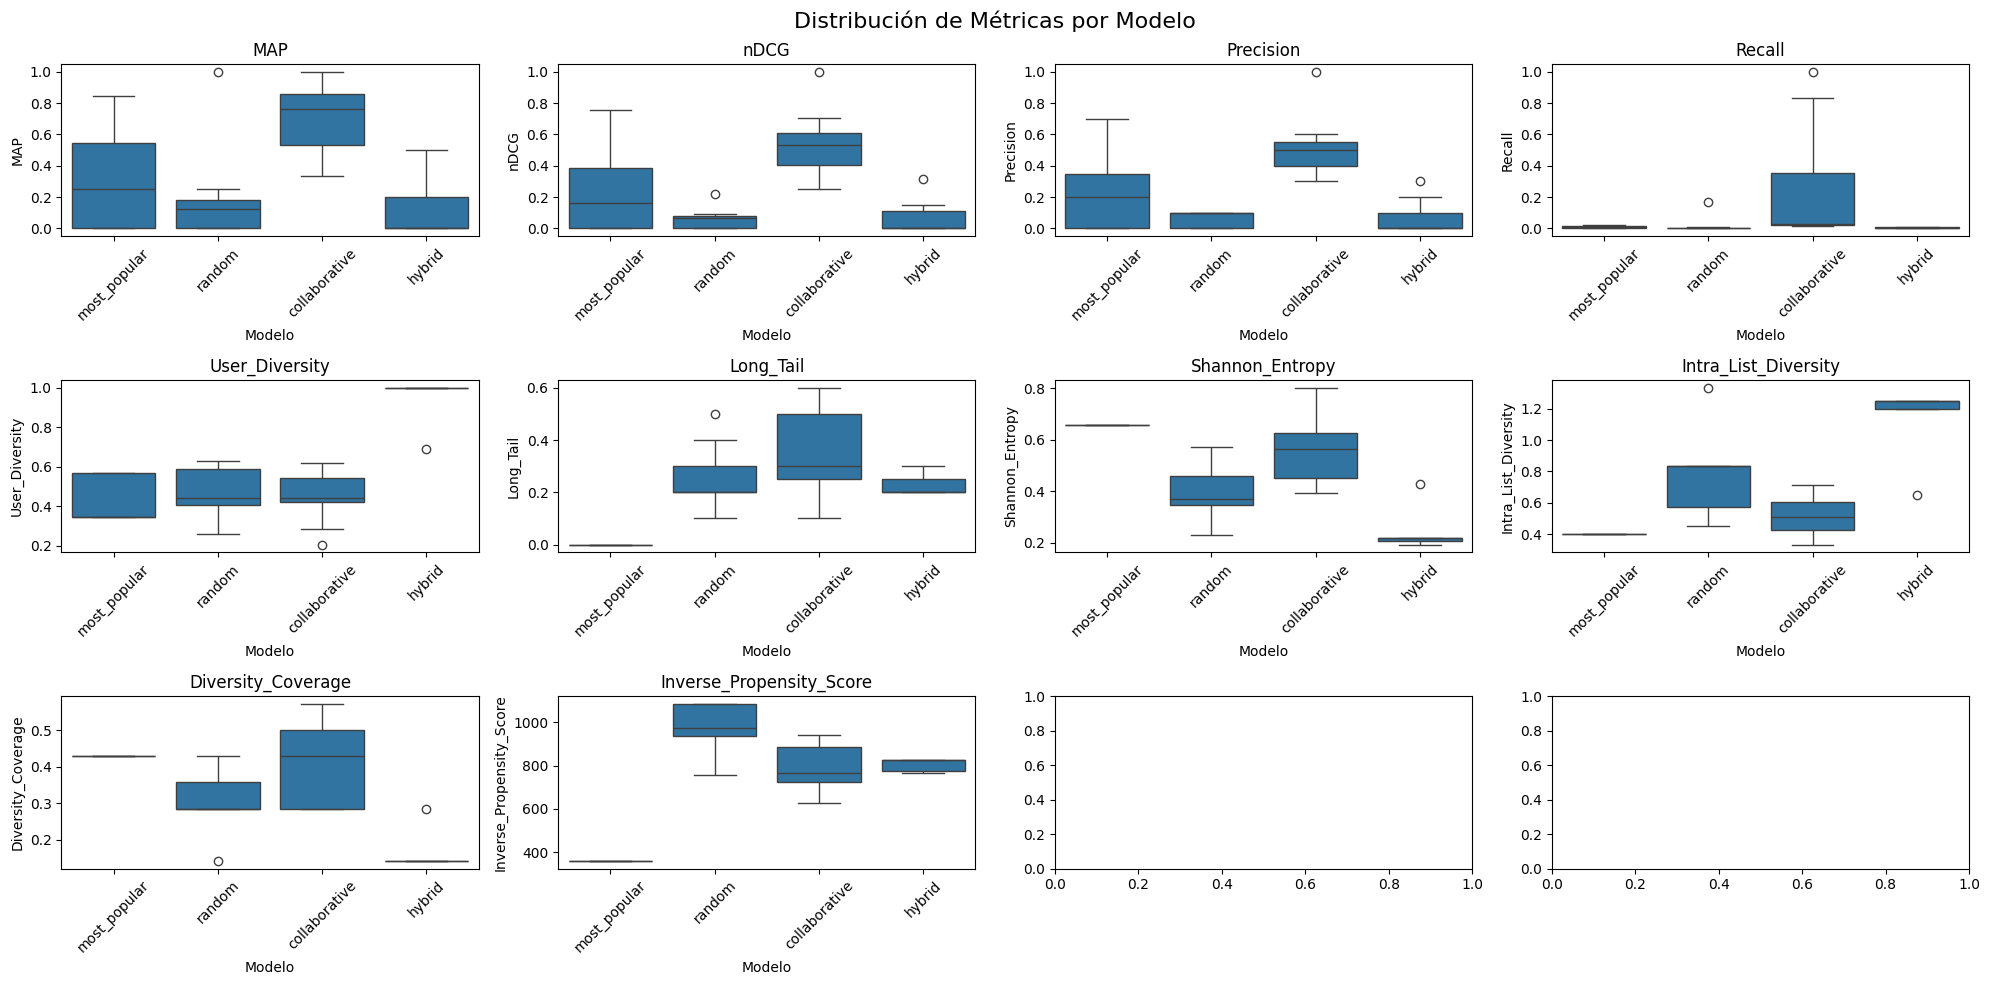

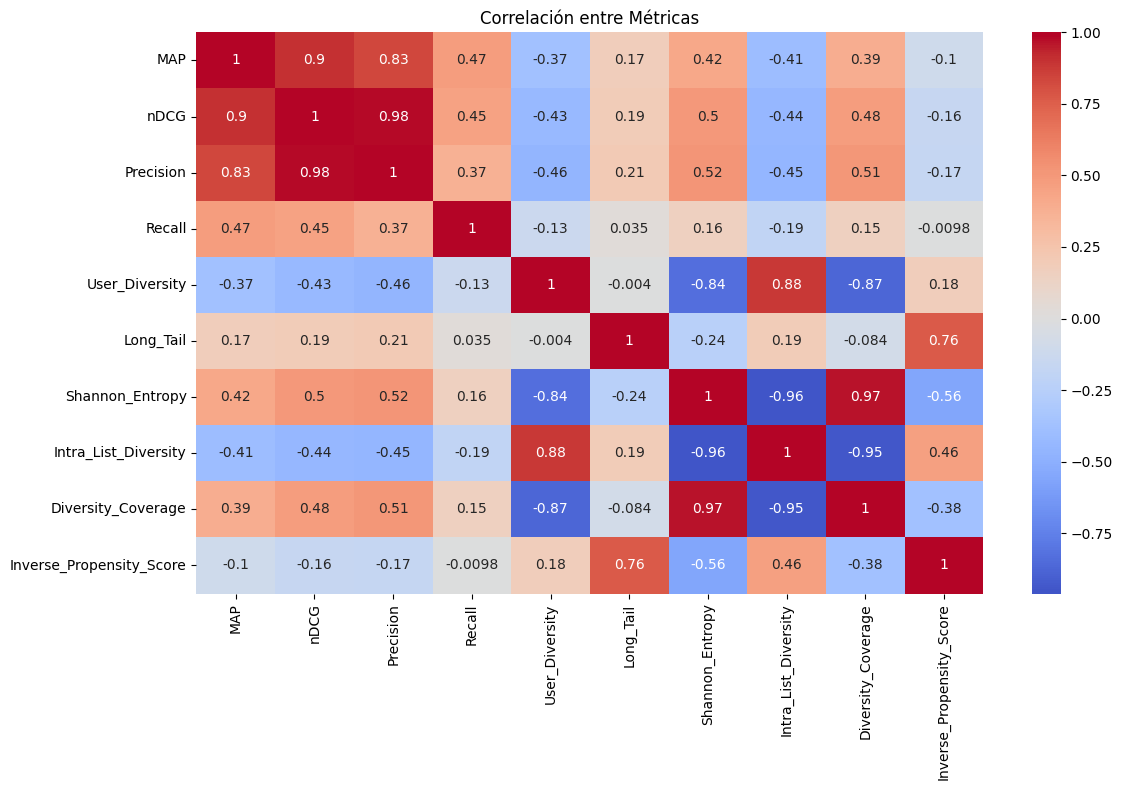

<ipython-input-131-e13b0fbe4920>:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values = np.concatenate((normalized_metrics.loc[model], [normalized_metrics.loc[model][0]]))


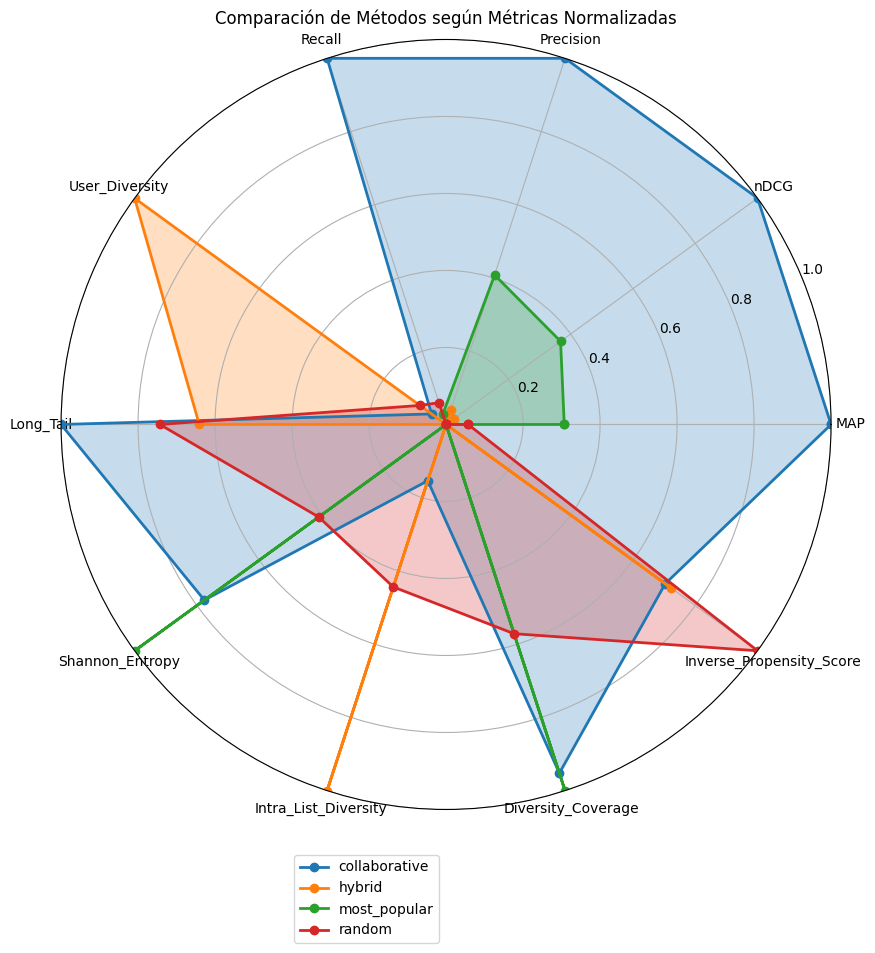

Promedios de Métricas por modelo:
               user_id     MAP    nDCG  Precision  Recall  User_Diversity  \
model                                                                       
collaborative      5.0  0.7007  0.5413     0.5000  0.2476          0.4517   
hybrid             5.0  0.1374  0.0686     0.0727  0.0033          0.9717   
most_popular       5.0  0.3103  0.2345     0.2364  0.0101          0.4263   
random             5.0  0.1697  0.0561     0.0545  0.0178          0.4722   

               Long_Tail  Shannon_Entropy  Intra_List_Diversity  \
model                                                             
collaborative     0.3545           0.5618                0.5225   
hybrid            0.2273           0.2295                1.1818   
most_popular      0.0000           0.6576                0.4028   
random            0.2636           0.4046                0.7485   

               Diversity_Coverage  Inverse_Propensity_Score  
model                                 

In [ ]:
# Obtener dataframe de resultados
results_df = global_metrics(data_music_test, data_music_train, 10, 5, alpha_hybrid=0.5, beta_lt=0.4, lambda_ips=0.5)

# Analisis estadistico usando nuestra funcion
analyze_global_metrics(results_df)

# Guardar dataframe de resultados
results_df.to_csv('global_metrics_results.csv', index=False)
print("DataFrame de resultados guardado en 'global_metrics_results.csv'")

Graficar ahora con distintos `top_n`para ver como se comportan las metricas de los distintos modelos.

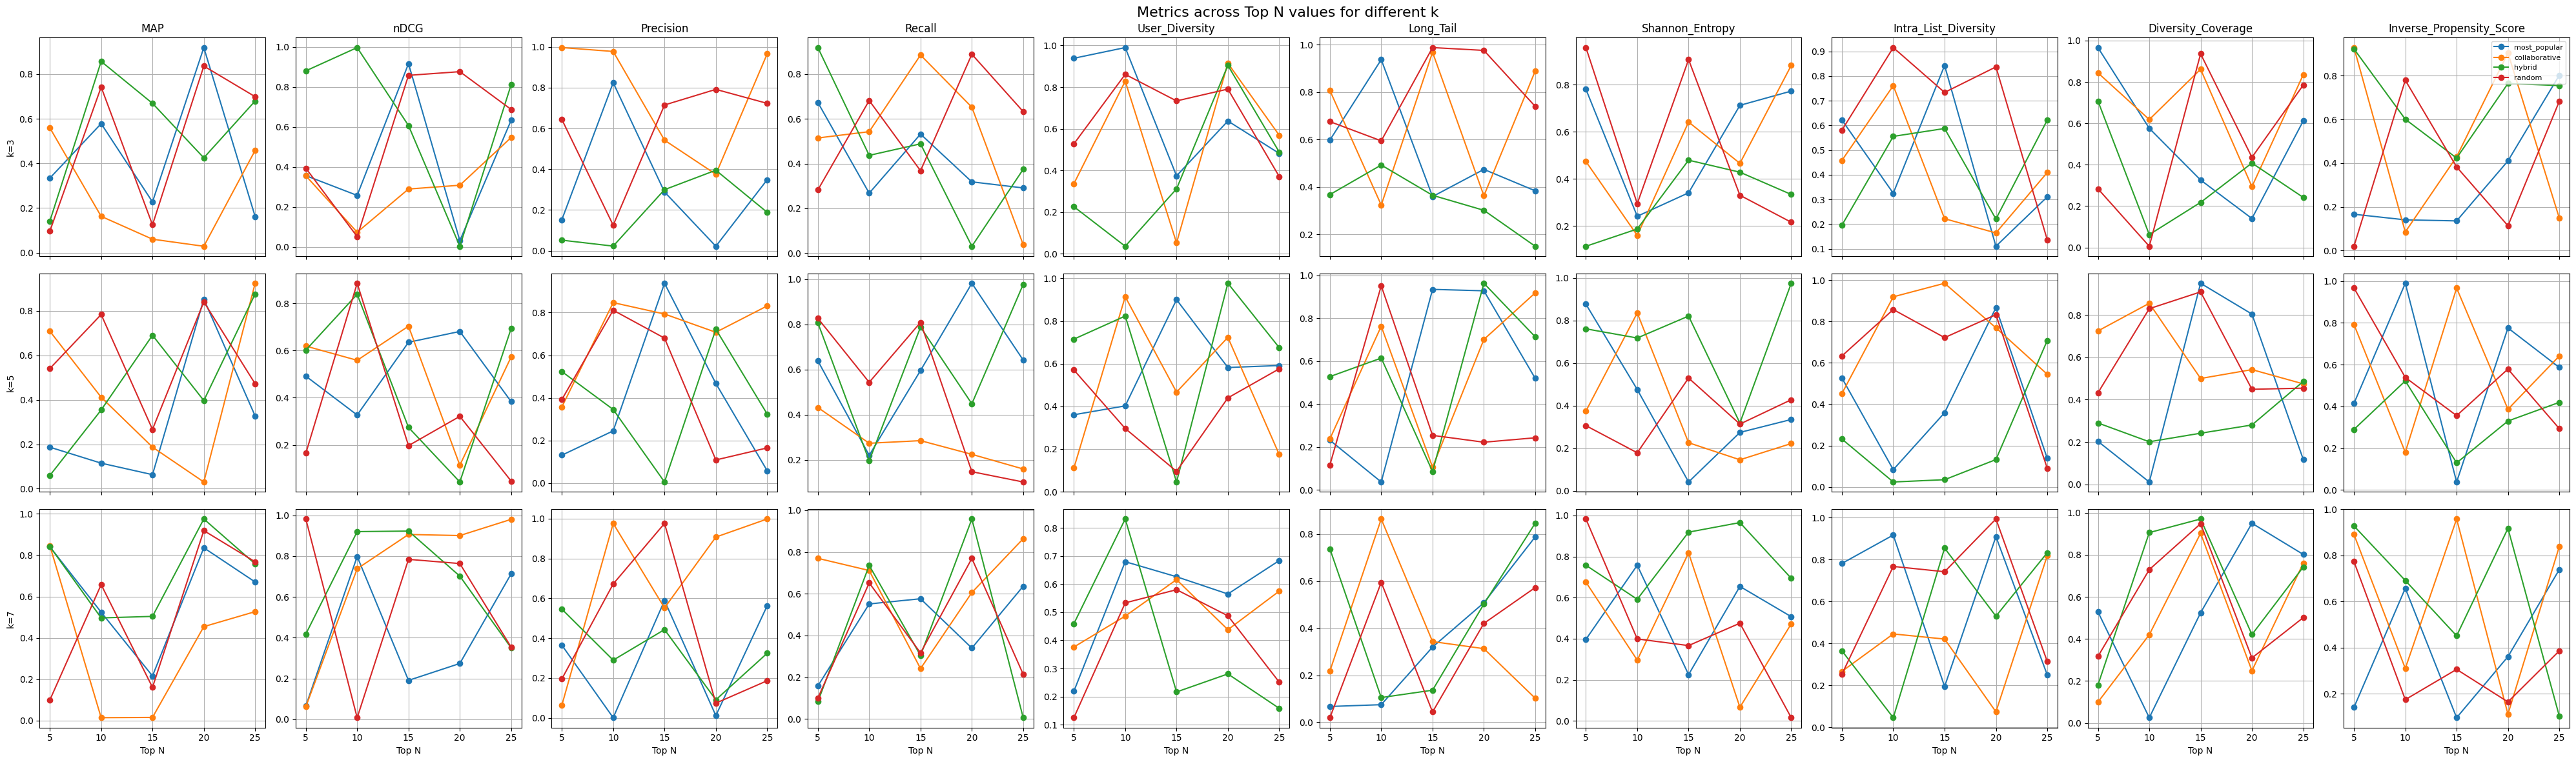

In [ ]:
# Actualización de los modelos
models = ['most_popular', 'collaborative', 'hybrid', 'random']
metrics = ['MAP', 'nDCG', 'Precision', 'Recall', 'User_Diversity', 'Long_Tail', 'Shannon_Entropy',
           'Intra_List_Diversity', 'Diversity_Coverage', 'Inverse_Propensity_Score']
top_n_list = [5, 10, 15, 20, 25]
k_category_list = [3, 5, 7]

# Crear datos simulados nuevamente para incluir los modelos actualizados
data = []
for model in models:
    for k in k_category_list:
        for top_n in top_n_list:
            values = np.random.rand(len(metrics))
            data.append([model, k, top_n] + list(values))

# Crear DataFrame actualizado
columns = ['model', 'k', 'top_n'] + metrics
df = pd.DataFrame(data, columns=columns)

# Crear figura con filas como k y columnas como métricas
fig, axes = plt.subplots(len(k_category_list), len(metrics), figsize=(40, 12), sharex=True, sharey=False)
fig.suptitle("Metrics across Top N values for different k", fontsize=16)

for i, k in enumerate(k_category_list):
    df_k = df[df['k'] == k]  # Filtrar por k

    for j, metric in enumerate(metrics):
        ax = axes[i, j]
        for model in models:
            df_model = df_k[df_k['model'] == model]
            ax.plot(df_model['top_n'], df_model[metric], label=model, marker='o')

        if i == 0:  # Títulos de las columnas (métricas)
            ax.set_title(metric)

        if j == 0:  # Etiquetas para cada fila (k)
            ax.set_ylabel(f"k={k}")

        ax.grid(True)
        if i == len(k_category_list) - 1:  # Etiqueta del eje X solo en la última fila
            ax.set_xlabel("Top N")

        if i == 0 and j == len(metrics) - 1:  # Solo una vez, agregar leyenda
            ax.legend(loc='upper right', fontsize=8)

plt.tight_layout()
plt.show()
